## Gathering Data 
1. Read WeRateDogs Twitter archive
2. Requests tweet image predictions
3. Get retweet count and favorite count through twitter API

- 1.Read WeRateDogs Twitter archive

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

In [2]:
WRD_arch = pd.read_csv('twitter-archive-enhanced.csv')
WRD_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- 2.Requests tweet image predictions

In [25]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [26]:
with open("image-predictions.tsv",mode='wb') as file:
        file.write(response.content)

In [27]:
Img_pre=pd.read_csv('image-predictions.tsv',sep='\t')
Img_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- 3.Get retweet count and favorite count through twitter API

In [3]:
import tweepy



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
if not os.path.exists('tweet_json.txt'):
    df = {}
    df['tweet'] = []
    # get tweet information for each tweet id
    for tweet_id in WRD_arch.tweet_id:
       # Some tweets can't be found and throw an error
        try:
            tweet = api.get_status(id = tweet_id)
            df['tweet'].append({
                "tweet_id": tweet_id,
                "retweet_count": tweet.retweet_count,
                "favourite_count": tweet.favorite_count,
            })
        # record the tweets that can't be found
        except:
            print('no {} tweet id'.format(tweet_id))
            
    # save tweets as json object into a text file
    with open('tweet_json.txt', 'w') as outfile:
        json.dump(df, outfile)

no 888202515573088257 tweet id
no 873697596434513921 tweet id
no 872668790621863937 tweet id
no 869988702071779329 tweet id
no 866816280283807744 tweet id
no 861769973181624320 tweet id
no 845459076796616705 tweet id
no 842892208864923648 tweet id
no 837012587749474308 tweet id
no 827228250799742977 tweet id
no 823699002998870016 tweet id
no 812747805718642688 tweet id
no 802247111496568832 tweet id
no 775096608509886464 tweet id
no 770743923962707968 tweet id


No handlers could be found for logger "tweepy.binder"


no 754011816964026368 tweet id
no 746790600704425984 tweet id
no 689517482558820352 tweet id
no 680055455951884288 tweet id
no 671362598324076544 tweet id


In [8]:
#Direct conversion into dataframe
RFcount=pd.DataFrame(df['tweet'])

In [22]:
with open('tweet_json.txt') as file:
    RFcount_json=json.load(file)

In [24]:
RFcount=pd.DataFrame(RFcount_json['tweet'])

## Assessing Data
1. Assessing WeRateDogs Twitter archive
2. Assessing tweet image predictions
3. Assessing retweet count and favorite count
4. Summary: 8 quality issues
5. Summary: 2 tidiness issues

- 1.Assessing WeRateDogs Twitter archive

In [37]:
#Visual assessment
WRD_arch.head(20)
#We can see there're NaN in in_reply_to_status_id, in_reply_to_user_id, etc
#timestamp is not python datetime
#NaN for doggo,floofer, pupper, puppo is none, not NaN.
#doggo,floofer, pupper, puppo can be combined to a single variable: dogstage

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [47]:
#programmatic assessments
print(WRD_arch.info())
#We can see there're missing data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [54]:
#Check missing data
WRD_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [49]:
#Check missing data
WRD_arch.isnull().in_reply_to_status_id.value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [50]:
#Check duplicate
WRD_arch.duplicated().sum()

0

In [60]:
#Check inaccurate data
WRD_arch.name.value_counts()
#There're 745 dogs that do not have name
#There're 55 dogs name a and 7 dogs name an. These do not seem to be name.
#None should be stored are NaN

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [61]:
WRD_arch.rating_numerator.value_counts()
#Normally the rating of dog is somewhere a bit above 10, like 12 pr 13. Thus, other numbers should be paying special attention

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [63]:
WRD_arch[WRD_arch['rating_numerator']==5]
#We can see one data, ID=694925794720792577, have an expanded_urls other than twitter
#Some tweet, for exsample ID=667550882905632768, starts with a "RT", this means that this tweet is a retweet rather than original.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None


In [73]:
WRD_arch[WRD_arch['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [62]:
WRD_arch.rating_denominator.value_counts()
#On a rating system with a denominator of 10. Demoninator other than one is suspicious

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [75]:
WRD_arch[WRD_arch['rating_denominator']==2]
#Checking the original twitter text, we'll find that it said "1/2 legged". denominator 2 refers to the legs, not rating.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


- 2.Assessing tweet image predictions

In [76]:
Img_pre.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [77]:
Img_pre.info()
#No missing variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [79]:
Img_pre.duplicated().sum()
#No duplicate

0

In [80]:
Img_pre.p1.value_counts()
#Prediction have valid names

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

- 3.Assessing retweet count and favorite count


In [81]:
RFcount.info()
#No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
favourite_count    2336 non-null int64
retweet_count      2336 non-null int64
tweet_id           2336 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [82]:
RFcount.head(10)

,favourite_count,retweet_count,tweet_id
0,38006,8312,892420643555336193
1,32632,6139,892177421306343426
2,24552,4065,891815181378084864
3,41354,8456,891689557279858688
4,39529,9154,891327558926688256
5,19860,3046,891087950875897856
6,11608,2018,890971913173991426
7,64132,18436,890729181411237888
8,27275,4182,890609185150312448
9,31297,7214,890240255349198849


In [85]:
RFcount.duplicated().sum()
#No duplicates

0

In [83]:
RFcount.describe()
#Twitter ID can be analyzed by describe function. This means that Twitter ID is an int type.

,favourite_count,retweet_count,tweet_id
count,2336.000000,2336.000000,2.336000e+03
mean,7959.702483,2929.427654,7.422337e+17
std,12331.923519,4934.727113,6.833885e+16
min,0.000000,0.000000,6.660209e+17
25%,1373.250000,587.750000,6.783394e+17
50%,3450.500000,1362.000000,7.186224e+17
75%,9737.000000,3412.000000,7.986954e+17
max,164186.000000,83572.000000,8.924206e+17


In [84]:
RFcount[RFcount['favourite_count']==164186]

,favourite_count,retweet_count,tweet_id
1022,164186,83572,744234799360020481


- 4.Summary: 8 quality issues


- 1) There're missing data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls 
- 2) There're 745 dogs that do not have name(“None”). None should be stored are NaN.
- 3) There're 55 dogs name "a" and 7 dogs name "an". These do not seem to be name.
- 4) Timestamp is not python datetime
- 5) NaN for doggo,floofer, pupper, puppo is none, not NaN
- 6) There are dogs with rating far more than 10 (for example 960 or 1776), and some with rating far smaller than 10 (like 0 or 1).
- 7) Some data, for example ID=694925794720792577, have an expanded_urls other than twitter
- 8) Some tweet, for exsample ID=667550882905632768, starts with a "RT", this means that this tweet is a retweet
- 9) There are tweets with a denominator other than 10. Demoninator other than ten is suspicious


- 5.Summary: 2 tidiness issues

- 1) Doggo,floofer, pupper, puppo can be combined to a single variable: dogstage
- 2) These data can be combined into a single spreadsheet.

## Cleaning Data
#### Define
1. Combine three dataset based on tweet_id
2. Combine doggo,floofer, pupper, puppo into a single variable: dogstage
3. Change none in dogstage to NaN. 
4. Change dogs whose names are “None”,"a" and "an" to NaN
5. Change Timestamp to python datetime
6. Delete data with expanded_urls other than twitter.
7. Delete retweets.
8. Delete tweets with denominator other than 10.

#### Code and test

In [126]:
#1. Combine three dataset based on tweet_id
df_combine=pd.merge(WRD_arch, RFcount, on='tweet_id',  how='inner')

In [127]:
df_combine=pd.merge(df_clean, Img_pre, on='tweet_id',  how='inner')

In [109]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2062
Data columns (total 31 columns):
tweet_id                      2063 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2063 non-null object
source                        2063 non-null object
text                          2063 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2063 non-null object
rating_numerator              2063 non-null int64
rating_denominator            2063 non-null int64
name                          2063 non-null object
doggo                         2063 non-null object
floofer                       2063 non-null object
pupper                        2063 non-null object
puppo                         2063 non-null object
favourite_count               2063 

In [130]:
#2. Combine doggo,floofer, pupper, puppo into a single variable: dogstage
df_clean=df_combine.copy()
df_clean['dogstage']= df_clean['doggo']
for i in range(len(df_clean['dogstage'])):
    if df_clean['floofer'][i]=='floofer':
        df_clean['dogstage'][i]='floofer'
for i in range(len(df_clean['dogstage'])):
    if df_clean['pupper'][i]=='pupper':
        df_clean['dogstage'][i]='pupper'
for i in range(len(df_clean['dogstage'])):
    if df_clean['puppo'][i]=='puppo':
        df_clean['dogstage'][i]='puppo'

/Users/shuruibian/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shuruibian/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/shuruibian/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [131]:
df_clean['dogstage'].value_counts()

None       1742
pupper      222
doggo        67
puppo        24
floofer       8
Name: dogstage, dtype: int64

In [156]:
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [152]:
#3. Change none in dogstage to NaN.
#4. Change dogs whose names are “None”,"a" and "an" to NaN
columns = ['name', 'dogstage']
for n in columns:
    df_clean[n] = df_clean[n].apply(lambda x: np.NaN if x == 'None' else x)
df_clean['name'] = df_clean['name'].apply(lambda x: np.NaN if x == 'an' or x == 'a' else x)

In [153]:
df_clean['dogstage'].value_counts()

pupper     222
doggo       67
puppo       24
floofer      8
Name: dogstage, dtype: int64

In [154]:
df_clean[df_clean['name']=='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y


In [155]:
df_clean['name'].value_counts()

Lucy         10
Charlie      10
Cooper       10
Tucker       10
Oliver       10
Penny        10
Bo            8
Lola          8
Sadie         8
Winston       7
Toby          7
Daisy         7
the           7
Milo          6
Scout         6
Jax           6
Koda          6
Bailey        6
Dave          6
Rusty         6
Bella         6
Stanley       6
Buddy         5
Leo           5
Oscar         5
Louis         5
Chester       5
Alfie         5
Larry         5
Phil          4
             ..
Ziva          1
Callie        1
Godzilla      1
Pavlov        1
Suki          1
Blitz         1
Alexander     1
Oshie         1
Jeremy        1
Stephan       1
Clyde         1
Livvie        1
Brudge        1
Lili          1
Grizzie       1
Mollie        1
Snoop         1
Lenox         1
Philbert      1
Finnegus      1
Zooey         1
Todo          1
Kanu          1
Dawn          1
Steve         1
Laika         1
Socks         1
Eazy          1
Kane          1
Opie          1
Name: name, Length: 932,

In [157]:
#5. Change Timestamp to python datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [164]:
type(df_clean['timestamp'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [191]:
#6. Delete data with expanded_urls other than twitter.
for i in range(len(df_clean)):
    if df_clean.expanded_urls[i][8:15]!='twitter':
        df_clean=df_clean.drop(i)

In [203]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2062
Data columns (total 38 columns):
tweet_id                      2034 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2034 non-null datetime64[ns]
source                        2034 non-null object
text                          2034 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2034 non-null object
rating_numerator              2034 non-null int64
rating_denominator            2034 non-null int64
name                          1405 non-null object
favourite_count               2034 non-null int64
retweet_count                 2034 non-null int64
jpg_url_x                     2034 non-null object
img_num_x                     2034 non-null int64
p1_x                          

In [204]:
#7. Delete retweets.
df_clean = df_clean[df_clean.retweeted_status_id.isna()]

In [205]:
len(df_clean)

1960

In [192]:
#8. Delete tweets with denominator other than 10.

2034

In [207]:
df_clean=df_clean[df_clean['rating_denominator']==10]

In [208]:
len(df_clean)

1943

In [209]:
df_clean['rating_denominator'].value_counts()

10    1943
Name: rating_denominator, dtype: int64

## Storing, Analyzing, and Visualizing Data for this Project
1. Save the clean file to csv called twitter_archive_master.csv
2. Analyze the distribution of retweet
3. Analyze the distribution of like 
4. Analyze the correlation between like and retweet 
5. Analyze rating of dog
6. Analyze the distribution of dog stage 

In [211]:
#1. Save data
df_clean.to_csv("twitter_archive_master.csv")

In [223]:
%%bash
pip install git+https://github.com/mwaskom/seaborn.git

  Cloning https://github.com/mwaskom/seaborn.git to /private/var/folders/g9/qpl3l24j561cpbkt7jytxm0m0000gn/T/pip-4Vgenc-build
  Running setup.py install for seaborn: started
    Running setup.py install for seaborn: finished with status 'done'


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [228]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [246]:
df_clean['retweet_count'].describe()

count     1943.000000
mean      2658.673186
std       4756.759691
min         12.000000
25%        585.000000
50%       1257.000000
75%       3047.000000
max      83572.000000
Name: retweet_count, dtype: float64

In [244]:
np.log10(df_clean['retweet_count'].describe())

count    3.288473
mean     3.424665
std      3.677311
min      1.079181
25%      2.767156
50%      3.099335
75%      3.483872
max      4.922061
Name: retweet_count, dtype: float64

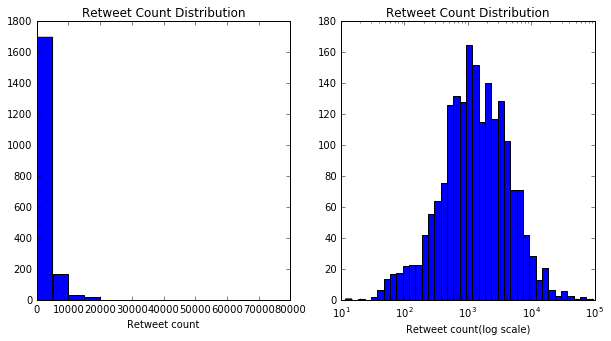

In [263]:
#2. Analyze the distribution of retweet
plt.figure(figsize = [10, 5]) 

# normal scale
plt.subplot(1, 2, 1) 
bin_edges = np.arange(0, df_clean['retweet_count'].max()+10, 5000)
plt.hist(data = df_clean, x = 'retweet_count', bins = bin_edges)
plt.xlabel('Retweet count')
plt.title('Retweet Count Distribution')

# log scale
plt.subplot(1, 2, 2) 
bin_edges = 10 ** np.arange(1.07, np.log10(df_clean['retweet_count'].max())+0.1, 0.1)
plt.hist(data = df_clean, x = 'retweet_count', bins = bin_edges)
plt.xscale('log')
plt.xlabel('Retweet count(log scale)')
plt.title('Retweet Count Distribution');

In [247]:
#3. Analyze the distribution of like
df_clean['favourite_count'].describe()

count      1943.000000
mean       8743.363356
std       12898.504663
min          78.000000
25%        1832.500000
50%        3848.000000
75%       10927.500000
max      164186.000000
Name: favourite_count, dtype: float64

In [248]:
np.log10(df_clean['favourite_count'].describe())

count    3.288473
mean     3.941679
std      4.110539
min      1.892095
25%      3.263044
50%      3.585235
75%      4.038521
max      5.215336
Name: favourite_count, dtype: float64

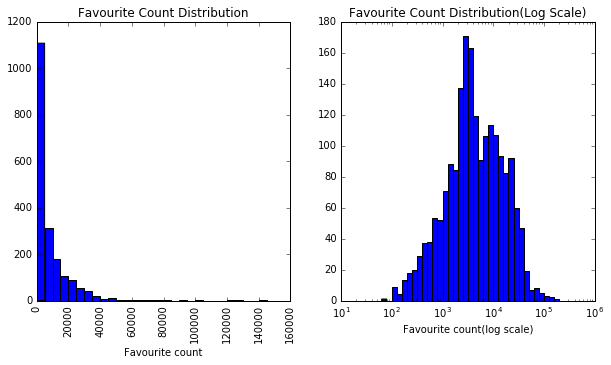

In [260]:
plt.figure(figsize = [10, 5]) 
plt.title('Favourite Count Distribution')

# normal scale
plt.subplot(1, 2, 1) 
bin_edges = np.arange(0, df_clean['favourite_count'].max()+10, 5000)
plt.hist(data = df_clean, x = 'favourite_count', bins = bin_edges)
plt.xticks(rotation=90)
plt.xlabel('Favourite count')
plt.title('Favourite Count Distribution')

# log scale
plt.subplot(1, 2, 2) 
bin_edges = 10 ** np.arange(1.8, np.log10(df_clean['favourite_count'].max())+0.1, 0.1)
plt.hist(data = df_clean, x = 'favourite_count', bins = bin_edges)
plt.xscale('log')
plt.xlabel('Favourite count(log scale)')
plt.title('Favourite Count Distribution(Log Scale)')

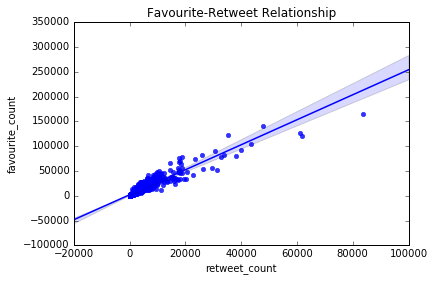

In [267]:
#4. Analyze the correlation between like and retweet 
sb.regplot(data = df_clean, x = 'retweet_count', y = 'favourite_count')
plt.title('Favourite-Retweet Relationship');

In [259]:
#Fitting an linear regression model
import statsmodels.api as sm;

df_clean['intercept'] = 1
lm = sm.OLS(df_clean['favourite_count'], df_clean[['intercept', 'retweet_count']])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        favourite_count   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:13:13   Log-Likelihood:                -19210.
No. Observations:                1943   AIC:                         3.842e+04
Df Residuals:                    1941   BIC:                         3.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2043.0461    123.763     16.508      0.000    1800.324    2285.768
retweet_count     2.5202      0.023    110.943      0.000       2.476       2.565
==============================================================================
Omnibus:                      505.074   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16207.016
Skew:                           0.548   Prob(JB):                         0.00
Kurtosis:                      17.106   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
#5. Analyze rating of dog（x_x；）
df_clean['rating_numerator'].value_counts()

12      437
10      417
11      392
13      248
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64

In [271]:
df_clean['rating_numerator'].describe()

count    1943.000000
mean       11.689655
std        41.196646
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

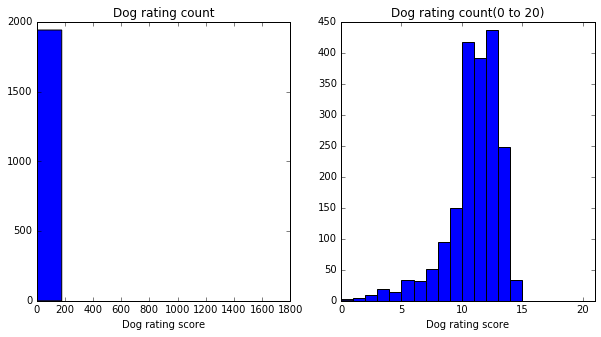

In [269]:
plt.figure(figsize = [10, 5])

# full data
plt.subplot(1, 2, 1)
plt.hist(data = df_clean, x = 'rating_numerator')
plt.xlabel('Dog rating score')
plt.title('Dog rating count')


# focus on rate between 0 and 20
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 20+1, 1)
plt.hist(data = df_clean, x = 'rating_numerator', bins=bin_edges)
plt.xlim(0, 21)
plt.xlabel('Dog rating score')
plt.title('Dog rating count(0 to 20)');

## Conclusion
On average, tweets by WeRateDog have been retweeted 2659 times with a standard deviation of 4757. The max number of retweet is 83572 times. On average, tweets by WeRateDog have been favourited 8743 times with a standard deviation of 12899. The max number of favourite is 164186 times. The distributions of retweet and favourite are bell shaped distributions in a log scale. Favourite and retweet have a linear relationship with an R-squared of 0.864. The distribution of dog rating is right-skewed on the overall scale and left-skewed between 0 and 20. 10, 11 and 12 are the most frequently got rating.